In [1]:
import pandas as pd
import numpy as np
import os, shutil 
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

from keras import models, layers

Using TensorFlow backend.


In [12]:
original_dataset_dir = 'E:\DATA_SCIENCE\Deep_Learning_with_Python_Book\dogs-cats-images\dog-vs-cat\\all'
base_dir = 'E:\DATA_SCIENCE\Deep_Learning_with_Python_Book\dogs-cats-images\cats_and_dogs_small'

In [7]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [14]:
fnames = [ 'cat.{}.jpg'.format(i) for i in range(1,1001) ]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [ 'cat.{}.jpg'.format(i) for i in range(1001, 1501) ]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [ 'cat.{}.jpg'.format(i) for i in range(1501, 2001) ]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


In [15]:
fnames = [ 'dog.{}.jpg'.format(i) for i in range(1,1001) ]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [ 'dog.{}.jpg'.format(i) for i in range(1001, 1501) ]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [ 'dog.{}.jpg'.format(i) for i in range(1501, 2001) ]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [16]:
print('total training cat images : ', len(os.listdir(train_cats_dir)))

total training cat images :  1000


In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [20]:
from keras import optimizers

model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr=1e-4),
    metrics = ['acc']
)

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)



Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 56s 564ms/step - loss: 0.6889 - acc: 0.5425 - val_loss: 0.6719 - val_acc: 0.5720
Epoch 2/30
100/100 [==============================] - 58s 584ms/step - loss: 0.6533 - acc: 0.6195 - val_loss: 0.6416 - val_acc: 0.6220
Epoch 3/30
100/100 [==============================] - 59s 585ms/step - loss: 0.6140 - acc: 0.6690 - val_loss: 0.6107 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 59s 586ms/step - loss: 0.5691 - acc: 0.6935 - val_loss: 0.5911 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 59s 588ms/step - loss: 0.5445 - acc: 0.7370 - val_loss: 0.5833 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 58s 585ms/step - loss: 0.5134 - acc: 0.7450 - val_loss: 0.6017 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 58s 582ms/step - loss: 0.4958 - acc: 0.7495 - val_loss: 0.5980 - val_acc: 0.6870
Epoch 8

NameError: name 'cats_and_dogs_small_1' is not defined

In [26]:
model.save('cats_and_dogs_small_1.h5')

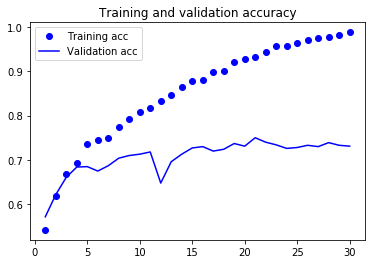

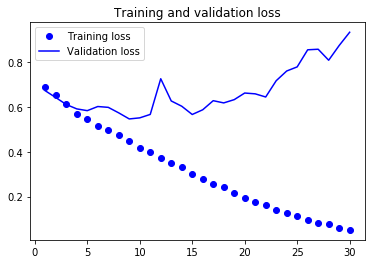

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [28]:
datagen = ImageDataGenerator (
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

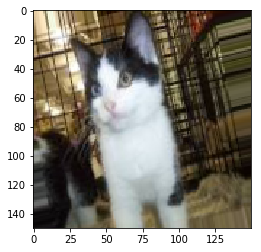

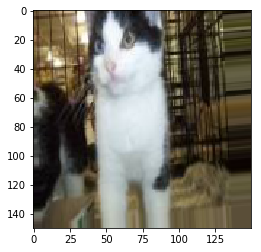

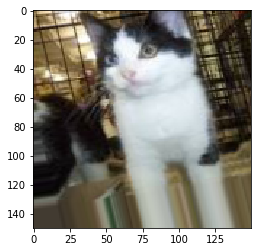

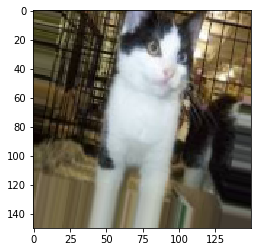

In [29]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
        
plt.show()

In [30]:
# dropout and augmentation

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr=1e-4),
    metrics = ['acc']
)

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 92s 915ms/step - loss: 0.6935 - acc: 0.5059 - val_loss: 0.6869 - val_acc: 0.5019
Epoch 2/100
100/100 [==============================] - 91s 912ms/step - loss: 0.6816 - acc: 0.5684 - val_loss: 0.6915 - val_acc: 0.5200
Epoch 3/100
100/100 [==============================] - 92s 918ms/step - loss: 0.6736 - acc: 0.5900 - val_loss: 0.6495 - val_acc: 0.6294
Epoch 4/100
100/100 [==============================] - 91s 911ms/step - loss: 0.6614 - acc: 0.5944 - val_loss: 0.6390 - val_acc: 0.6153
Epoch 5/100
100/100 [==============================] - 92s 917ms/step - loss: 0.6463 - acc: 0.6250 - val_loss: 0.6150 - val_acc: 0.6586
Epoch 6/100
100/100 [==============================] - 91s 915ms/step - loss: 0.6293 - acc: 0.6419 - val_loss: 0.5912 - val_acc: 0.6649
Epoch 7/100
100/100 [==============================] - 92s 916ms/step - loss: 0.6197 - acc: 0.6503 - val_loss: 0.5960 - val_acc: 0.6694
Epoch 8/100
100/100 [===========================

100/100 [==============================] - 156s 2s/step - loss: 0.4029 - acc: 0.8219 - val_loss: 0.4237 - val_acc: 0.8073
Epoch 62/100
100/100 [==============================] - 155s 2s/step - loss: 0.4058 - acc: 0.8137 - val_loss: 0.4797 - val_acc: 0.7919
Epoch 63/100
100/100 [==============================] - 155s 2s/step - loss: 0.3988 - acc: 0.8153 - val_loss: 0.6128 - val_acc: 0.7332
Epoch 64/100
100/100 [==============================] - 156s 2s/step - loss: 0.4158 - acc: 0.8050 - val_loss: 0.4328 - val_acc: 0.8009
Epoch 65/100
100/100 [==============================] - 165s 2s/step - loss: 0.4031 - acc: 0.8172 - val_loss: 0.4670 - val_acc: 0.8027
Epoch 66/100
100/100 [==============================] - 171s 2s/step - loss: 0.4047 - acc: 0.8181 - val_loss: 0.4354 - val_acc: 0.8086
Epoch 67/100
100/100 [==============================] - 169s 2s/step - loss: 0.3938 - acc: 0.8159 - val_loss: 0.4697 - val_acc: 0.7912
Epoch 68/100
100/100 [==============================] - 171s 2s/step

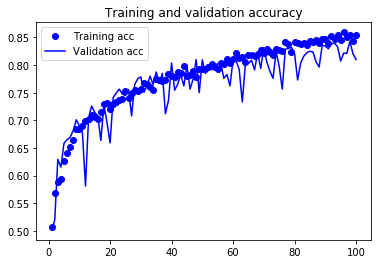

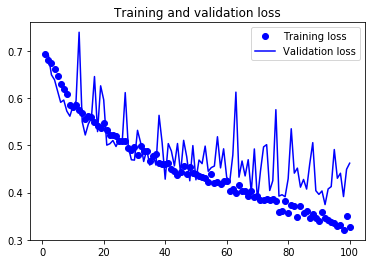

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
